In [1]:
#Import thư viện
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import pandas as pd

In [3]:
#import file xlxs
df = pd.read_excel('ADAUSDT.xlsx')

In [4]:
#Chuyển dữ liệu Close time trong DataFrame từ chuỗi sang Datetime theo định dạng ngày tháng năm
def convert_date(s):
  return datetime.datetime.strptime(s, "%d-%m-%Y")
df['Close time']=df['Close time'].apply(convert_date)

In [5]:
#Sắp xếp close time theo thứ tự tăng dần
#chuyển cột close date thành index cho dataframe 
#Do là dữ liệu này mang tính time series, Nên index của mỗi dòng nên là thời gian Để đảm bảo tính time series cho dữ liệu
df=df.set_index('Close time').sort_index()

In [6]:
df

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2019-03-22,21-03-2019,0.054,0.055,0.050,0.052,286797501.8,1.504575e+07,41525,131454870.8,6.908864e+06,0
2019-03-23,22-03-2019,0.052,0.059,0.052,0.058,421719603.6,2.380675e+07,66113,213984777.7,1.206511e+07,0
2019-03-24,23-03-2019,0.058,0.065,0.057,0.063,534272459.0,3.255881e+07,86175,256813665.5,1.561654e+07,0
2019-03-25,24-03-2019,0.063,0.065,0.059,0.062,415661855.5,2.550184e+07,71173,204932507.5,1.257689e+07,0
2019-03-26,25-03-2019,0.061,0.062,0.056,0.059,313417482.6,1.850517e+07,49172,158432327.9,9.364228e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25,24-03-2023,0.372,0.372,0.355,0.360,112029219.9,4.064170e+07,109763,52275535.0,1.897136e+07,0
2023-03-26,25-03-2023,0.360,0.363,0.349,0.351,83603550.1,2.977094e+07,83654,37953417.1,1.353030e+07,0
2023-03-27,26-03-2023,0.351,0.361,0.349,0.356,91774166.9,3.265150e+07,72275,43527420.9,1.548775e+07,0


In [7]:
# Chọn các cột dữ liệu cần thiết
X = df[['Open', 'High', 'Low', 'Volume', 'Number of trades']]
y = df['Close']


In [9]:
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-2-1
X_train = X[:int(X.shape[0]*0.7)]
y_train = y[:int(y.shape[0]*0.7)]

X_test = X[int(X.shape[0]*0.7):int(X.shape[0]*0.9)]
y_test = y[int(y.shape[0]*0.7):int(y.shape[0]*0.9)]

X_predict = X[int(X.shape[0]*0.9):]
y_predict = y[int(y.shape[0]*0.9):]

In [10]:
# Chuẩn hóa dữ liệu bằng StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_predict_scaled = scaler.transform(X_predict)

In [16]:
# Khởi tạo model SVR với C = 1.0, kernel là 'linear'
svr = SVR(C=100.0, kernel='linear')
svr.fit(X_train_scaled, y_train)
svr_rbf_confidence = svr.score(X_test, y_test)
print('svr accuracy: ', svr_rbf_confidence)

svr accuracy:  -113352777923.89314


c:\Users\hello\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [28]:
# Train mô hình trên tập train
svr.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [29]:
# Dự đoán giá trên tập test và predict
y_pred_test = svr.predict(X_test_scaled)
y_pred_predict = svr.predict(X_predict_scaled)

y_pred_test= pd.Series(y_pred_test, index= X_test.index)
y_pred_predict= pd.Series(y_pred_predict, index= X_predict.index)

In [30]:
y_pred_test= pd.Series(y_pred_test, index= X_test.index)
y_pred_predict= pd.Series(y_pred_predict, index= X_predict.index)

In [31]:
# Tính toán độ lỗi trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE trên tập test: {:.5f}".format(rmse_test))

mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE trên tập test: {:.5f} %".format(mape_test * 100))

# Tính toán độ lỗi trên tập predict
rmse_predict = mean_squared_error(y_predict, y_pred_predict)
print("RMSE trên tập predict: {:.5f}".format(rmse_predict))

mape_predict = mean_absolute_percentage_error(y_predict, y_pred_predict)
print("MAPE trên tập predict: {:.5f} %".format(mape_predict * 100))

RMSE trên tập test: 0.00091
MAPE trên tập test: 4.25351 %
RMSE trên tập predict: 0.00078
MAPE trên tập predict: 8.25759 %


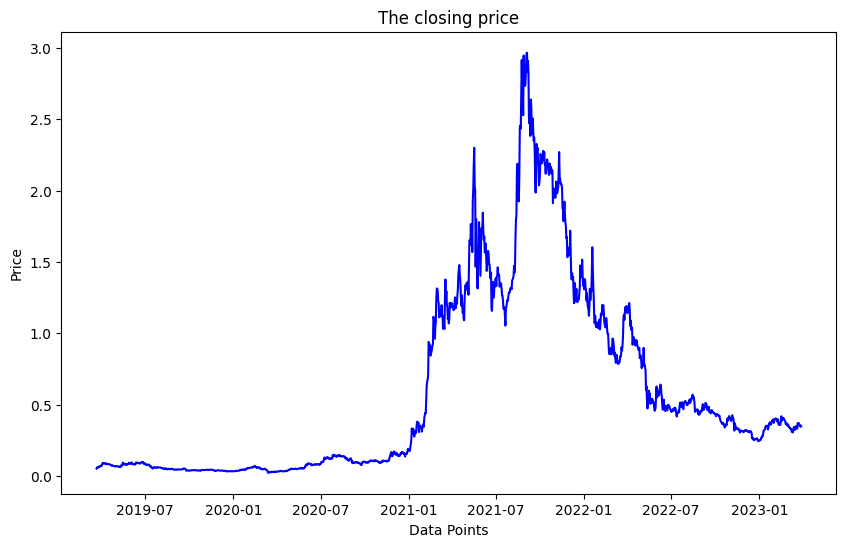

In [33]:
#Trực quan hóa kết quả
plt.figure(figsize=(10,6))
plt.plot(pd.concat([y_train, y_test, y_predict]), color='blue')

plt.title('The closing price')
plt.ylabel('Price')
plt.xlabel('Data Points')
plt.show()

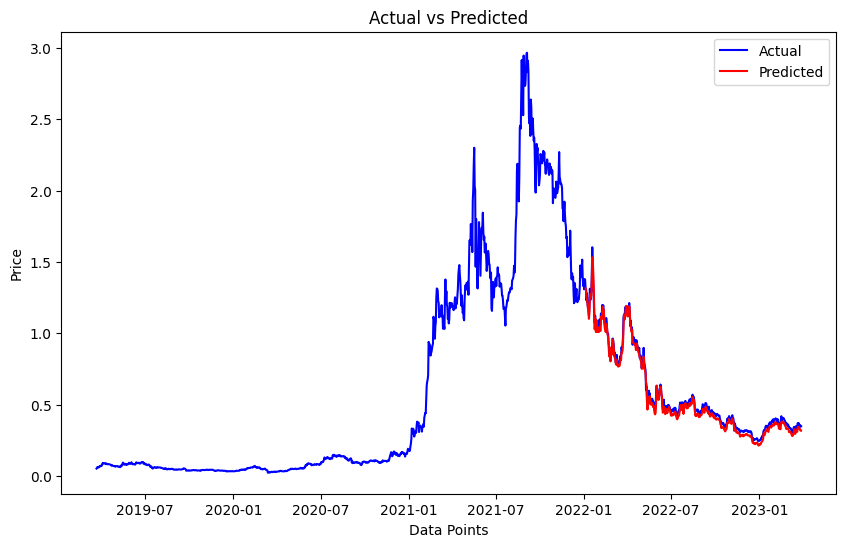

In [34]:
#Trực quan hóa kết quả
plt.figure(figsize=(10,6))
plt.plot(pd.concat([y_train, y_test, y_predict]), color='blue', label='Actual')
plt.plot(pd.concat([y_pred_test, y_pred_predict]), color='red', label='Predicted')

plt.title('Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Data Points')
plt.legend()
plt.show()